## Bài 1: Xây dựng mô hình LeNet. Huấn luyện và đánh giá mô hình LeNet trên 4 độ đo precision, recall và F1-macro (sử dụng Adam làm optimizer).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, utils, optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (
    Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D,
    Dense, Dropout, BatchNormalization, Activation
)

In [ ]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)


In [4]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
# Thêm chiều channel
X_train = np.expand_dims(X_train, axis=-1)  # (60000, 28, 28, 1)
X_test = np.expand_dims(X_test, axis=-1)    # (10000, 28, 28, 1)
# Chuyển labels sang one-hot
num_classes = 10
y_train_cat = utils.to_categorical(y_train, num_classes)
y_test_cat = utils.to_categorical(y_test, num_classes)
print("After reshape:", X_train.shape, y_train_cat.shape)

After reshape: (60000, 28, 28, 1) (60000, 10)


In [6]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train_cat, test_size=0.1, random_state=42
)

print("Train:", X_tr.shape, "Validation:", X_val.shape)


Train: (54000, 28, 28, 1) Validation: (6000, 28, 28, 1)


In [19]:
#CẤU TRÚC CỦA MÔ HÌNH LENET-5
model = Sequential([
    Conv2D(6, (5,5), activation='relu', padding='same', input_shape=(28,28,1)),
    AveragePooling2D(pool_size=(2,2), strides=2),
    
    Conv2D(16, (5,5), activation='relu'),
    AveragePooling2D(pool_size=(2,2), strides=2),
    
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])

c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
from tensorflow.keras import optimizers

optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_tr, y_tr,
    validation_data=(X_val, y_val),
    epochs=8,
    batch_size=128,
    verbose=1
)


Epoch 1/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8926 - loss: 0.3633 - val_accuracy: 0.9698 - val_loss: 0.1091
Epoch 2/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9706 - loss: 0.0990 - val_accuracy: 0.9763 - val_loss: 0.0837
Epoch 3/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9782 - loss: 0.0709 - val_accuracy: 0.9830 - val_loss: 0.0619
Epoch 4/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9826 - loss: 0.0574 - val_accuracy: 0.9855 - val_loss: 0.0508
Epoch 5/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9854 - loss: 0.0471 - val_accuracy: 0.9883 - val_loss: 0.0410
Epoch 6/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9876 - loss: 0.0397 - val_accuracy: 0.9873 - val_loss: 0.0469
Epoch 7/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9884 - loss: 0.0350 - val_accuracy: 0.9888 - val_loss: 0.0389
Epoch 8/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9902 - loss: 0.0311 - val_accuracy: 0.9888

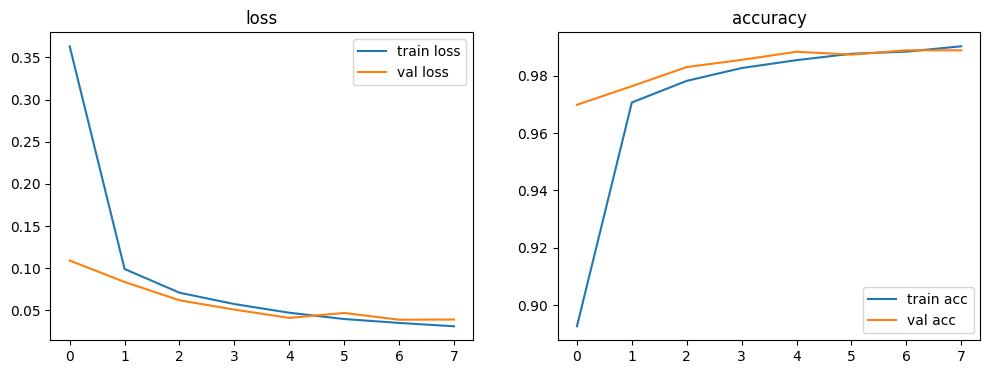

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend(); plt.title("loss")
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend(); plt.title("accuracy")
plt.show()


In [22]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"test accuracy: {test_acc:.4f} | test loss: {test_loss:.4f}")


test accuracy: 0.9905 | test loss: 0.0309


In [23]:
from sklearn.metrics import classification_report, confusion_matrix


y_prob = googlenet.predict(X_test, verbose=0)
y_pred = np.argmax(y_prob, axis=1)
y_true = np.argmax(y_test_cat, axis=1)
print(classification_report(y_true, y_pred, digits=4))


              precision    recall  f1-score   support

           0     0.9980    0.9959    0.9969       980
           1     0.9965    0.9947    0.9956      1135
           2     0.9923    0.9942    0.9932      1032
           3     0.9824    0.9970    0.9897      1010
           4     0.9959    0.9908    0.9934       982
           5     0.9899    0.9922    0.9910       892
           6     0.9948    0.9906    0.9927       958
           7     0.9913    0.9942    0.9927      1028
           8     0.9918    0.9908    0.9913       974
           9     0.9920    0.9841    0.9881      1009

    accuracy                         0.9925     10000
   macro avg     0.9925    0.9925    0.9925     10000
weighted avg     0.9925    0.9925    0.9925     10000



## Bài 2: Xây dựng mô hình GoogLeNet. Huấn luyện và đánh giá mô hình GoogLeNet trên 4 độ đo precision, recall và F1 (sử dụng Adam làm optimizer).


In [24]:
def inception_block(x, filters):
 
    f1, f3r, f3, f5r, f5, fp = filters

    #branch 1:1x1
    branch1 = Conv2D(f1, (1,1), padding='same', activation='relu')(x)

    #branch 2:1x1 -> 3x3
    branch2 = Conv2D(f3r, (1,1), padding='same', activation='relu')(x)
    branch2 = Conv2D(f3, (3,3), padding='same', activation='relu')(branch2)

    #branch 3:1x1 -> 5x5
    branch3 = Conv2D(f5r, (1,1), padding='same', activation='relu')(x)
    branch3 = Conv2D(f5, (5,5), padding='same', activation='relu')(branch3)

    #branch 4:Pooling -> 1x1
    branch4 = MaxPooling2D((3,3), strides=(1,1), padding='same')(x)
    branch4 = Conv2D(fp, (1,1), padding='same', activation='relu')(branch4)

    #gộp 4 branch lại
    output = concatenate([branch1, branch2, branch3, branch4], axis=-1)
    return output


In [ ]:
input_layer = Input(shape=(28,28,1))

#lớp Conv input đầu vào
x = Conv2D(64, (3,3), padding='same', activation='relu')(input_layer)
x = MaxPooling2D((2,2), strides=2)(x)

#2 block inception
x = inception_block(x, (32, 48, 64, 8, 16, 16))
x = inception_block(x, (64, 64, 96, 16, 48, 32))
x = MaxPooling2D((2,2), strides=2)(x)

#Flatten với FC
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
output = Dense(num_classes, activation='softmax')(x)
googlenet = Model(inputs=input_layer, outputs=output)
googlenet.build((None, 28, 28, 1))
googlenet.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_30 (Conv2D)  │ (None, 28, 28,    │        640 │ input_layer_4[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 14, 14,    │          0 │ conv2d_30[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_32 (Conv2D)  │ (None, 14, 14,    │      3,120 │ max_pooling2d_8[… │
│                     │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_34 (Conv2D)  │ (None, 14, 14, 8) │        520 │ max_pooling2d_8[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 14, 14,    │          0 │ max_pooling2d_8[… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_31 (Conv2D)  │ (None, 14, 14,    │      2,080 │ max_pooling2d_8[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_33 (Conv2D)  │ (None, 14, 14,    │     27,712 │ conv2d_32[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_35 (Conv2D)  │ (None, 14, 14,    │      3,216 │ conv2d_34[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_36 (Conv2D)  │ (None, 14, 14,    │      1,040 │ max_pooling2d_9[… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 14, 14,    │          0 │ conv2d_31[0][0],  │
│ (Concatenate)       │ 128)              │            │ conv2d_33[0][0],  │
│                     │                   │            │ conv2d_35[0][0],  │
│                     │                   │            │ conv2d_36[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_38 (Conv2D)  │ (None, 14, 14,    │      8,256 │ concatenate_4[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_40 (Conv2D)  │ (None, 14, 14,    │      2,064 │ concatenate_4[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_10    │ (None, 14, 14,    │          0 │ concatenate_4[0]… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_37 (Conv2D)  │ (None, 14, 14,    │      8,256 │ concatenate_4[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_39 (Conv2D)  │ (None, 14, 14,    │     55,392 │ conv2d_38[0][0]   │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 1,642,370 (6.27 MB)

 Trainable params: 1,642,370 (6.27 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
optimizer = optimizers.Adam(learning_rate=0.001)
googlenet.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history = googlenet.fit(
    X_tr, y_tr,
    validation_data=(X_val, y_val),
    epochs=8,
    batch_size=128,
    verbose=1
)


Epoch 1/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 61ms/step - accuracy: 0.9303 - loss: 0.2231 - val_accuracy: 0.9860 - val_loss: 0.0476
Epoch 2/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 26s 62ms/step - accuracy: 0.9807 - loss: 0.0664 - val_accuracy: 0.9897 - val_loss: 0.0348
Epoch 3/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 26s 61ms/step - accuracy: 0.9865 - loss: 0.0453 - val_accuracy: 0.9908 - val_loss: 0.0309
Epoch 4/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 26s 61ms/step - accuracy: 0.9898 - loss: 0.0343 - val_accuracy: 0.9913 - val_loss: 0.0287
Epoch 5/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 26s 62ms/step - accuracy: 0.9915 - loss: 0.0276 - val_accuracy: 0.9888 - val_loss: 0.0379
Epoch 6/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 26s 63ms/step - accuracy: 0.9928 - loss: 0.0241 - val_accuracy: 0.9910 - val_loss: 0.0312
Epoch 7/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 26s 62ms/step - accuracy: 0.9942 - loss: 0.0187 - val_accuracy: 0.9922 - val_loss: 0.0326
Epoch 8/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 26s 62ms/step - accuracy: 0.9948 - loss: 0.0173 - val_accu

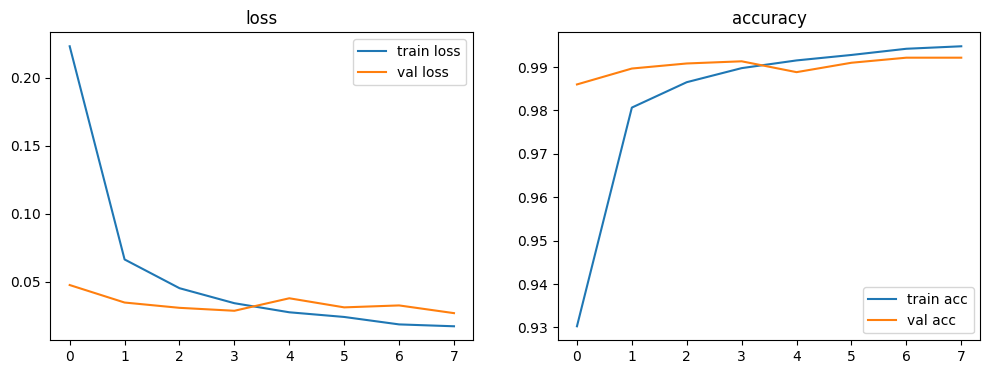

In [27]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend(); plt.title("loss")
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend(); plt.title("accuracy")
plt.show()


In [28]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"test accuracy: {test_acc:.4f} | test loss: {test_loss:.4f}")
y_prob = googlenet.predict(X_test, verbose=0)
y_pred = np.argmax(y_prob, axis=1)
y_true = np.argmax(y_test_cat, axis=1)
print(classification_report(y_true, y_pred, digits=4))


test accuracy: 0.9905 | test loss: 0.0309
              precision    recall  f1-score   support

           0     0.9929    0.9980    0.9954       980
           1     0.9974    0.9956    0.9965      1135
           2     0.9951    0.9922    0.9937      1032
           3     0.9911    0.9941    0.9926      1010
           4     0.9979    0.9908    0.9944       982
           5     0.9845    0.9944    0.9894       892
           6     0.9958    0.9875    0.9916       958
           7     0.9865    0.9942    0.9903      1028
           8     0.9908    0.9918    0.9913       974
           9     0.9930    0.9871    0.9901      1009

    accuracy                         0.9926     10000
   macro avg     0.9925    0.9926    0.9925     10000
weighted avg     0.9926    0.9926    0.9926     10000



## Bài 3*: Xây dựng mô hình ResNet-18, đánh giá mô hình ResNet-18 trên bộ dữ liệu VinaFood21 sử dụng các độ đo precision, recall, và F1 (Sử dụng Adam làm optimizer).


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
import time

In [4]:
import os

In [5]:

from torchvision import datasets, transforms

transform_train = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

transform_test = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


In [6]:
data= r"D:\DEEPLEARNING\VinaFood21\VinaFood21"

train = os.path.join(data, "train")
test= os.path.join(data, "test")
train_dataset = datasets.ImageFolder(train, transform=transform_train)
test_dataset  = datasets.ImageFolder(test,  transform=transform_test)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)
print(f"số lớp: {len(train_dataset.classes)}")
print("lớp đầu tiên:", train_dataset.classes[:5])
print("ảnh train:", len(train_dataset))
print("ảnh test:", len(test_dataset))


số lớp: 21
lớp đầu tiên: ['banh-can', 'banh-hoi', 'banh-mi-chao', 'banh-tet', 'banh-trang-tron']
ảnh train: 10044
ảnh test: 6682


In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = len(train_dataset.classes)
model = models.resnet18(weights='IMAGENET1K_V1')
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [8]:
def run(model, criterion, optimizer, train_loader, test_loader, epochs=5):
    train_loss, test_acc = [], []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        model.eval()
        y_true, y_pred = [], []
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                preds = outputs.argmax(dim=1)
                y_true.extend(labels.cpu().numpy())
                y_pred.extend(preds.cpu().numpy())

        #các độ đo
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')
        acc = np.mean(np.array(y_true) == np.array(y_pred))

        print(f"Epoch [{epoch+1}/{epochs}] | "
              f"Loss: {running_loss/len(train_loader):.4f} | "
              f"Acc: {acc*100:.2f}% | "
              f"Precision: {precision:.4f} | Recall: {recall:.4f} | F1: {f1:.4f}")

        train_loss.append(running_loss/len(train_loader))
        test_acc.append(acc)

    return train_loss, test_acc

In [9]:
train_loss, test_acc = run(model, criterion, optimizer, train_loader, test_loader, epochs=5)


Epoch [1/5] | Loss: 1.3992 | Acc: 47.25% | Precision: 0.6145 | Recall: 0.4334 | F1: 0.4176
Epoch [2/5] | Loss: 0.8996 | Acc: 61.85% | Precision: 0.6647 | Recall: 0.6335 | F1: 0.6167
Epoch [3/5] | Loss: 0.7016 | Acc: 62.72% | Precision: 0.6834 | Recall: 0.6210 | F1: 0.6119
Epoch [4/5] | Loss: 0.5990 | Acc: 65.21% | Precision: 0.6965 | Recall: 0.6532 | F1: 0.6464
Epoch [5/5] | Loss: 0.4985 | Acc: 58.99% | Precision: 0.7093 | Recall: 0.5745 | F1: 0.5976


### Bài 4*: Sử dụng pretrained ResNet50 từ HuggingFace để fine-tune trên bộ dữ liệu VinaFood21.

In [ ]:
from transformers import AutoImageProcessor, ResNetForImageClassification

#mô hình pretrained ResNet-50
model_name = "microsoft/resnet-50"
processor = AutoImageProcessor.from_pretrained(model_name)
model = ResNetForImageClassification.from_pretrained(model_name,num_labels=21)
model.to(device)

In [11]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
epochs = 5

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for imgs, labels in test_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            preds = torch.argmax(outputs, dim=1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    precision = precision_score(y_true, y_pred, average='macro')
    recall    = recall_score(y_true, y_pred, average='macro')
    f1        = f1_score(y_true, y_pred, average='macro')
    print(f"Epoch [{epoch+1}/{epochs}] | Loss: {running_loss/len(train_loader):.4f} "
          f"| Precision: {precision:.4f} | Recall: {recall:.4f} | F1: {f1:.4f}")


Epoch [1/5] | Loss: 0.2271 | Precision: 0.8109 | Recall: 0.8072 | F1: 0.8065
Epoch [2/5] | Loss: 0.1363 | Precision: 0.8224 | Recall: 0.8157 | F1: 0.8157
Epoch [3/5] | Loss: 0.1013 | Precision: 0.8265 | Recall: 0.8221 | F1: 0.8223
Epoch [4/5] | Loss: 0.0665 | Precision: 0.8277 | Recall: 0.8254 | F1: 0.8243
Epoch [5/5] | Loss: 0.0566 | Precision: 0.8385 | Recall: 0.8343 | F1: 0.8344
